## Data Cleaning

Columns: 

| Column Name  | Description                                           |
|--------------|-------------------------------------------------------|
| Poster_Link  | Link of the poster that IMDB is using                 |
| Series_Title | Name of the movie                                     |
| Released_Year| Year at which the movie was released                  |
| Certificate  | Certificate earned by the movie                       |
| Runtime      | Total runtime of the movie                            |
| Genre        | Genre of the movie                                    |
| IMDB_Rating  | Rating of the movie on the IMDB site                  |
| Overview     | Mini story/summary                                    |
| Meta_score   | Score earned by the movie                             |
| Director     | Name of the Director                                  |
| Star1        | Name of the first star                                |
| Star2        | Name of the second star                               |
| Star3        | Name of the third star                                |
| Star4        | Name of the fourth star                               |
| No_of_votes  | Total number of votes                                 |
| Gross        | Money earned by the movie                             |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in dataset
df = pd.read_csv("imdb_top_1000_original.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [3]:
# Info for dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
# Drop unnecessary columns
df = df.drop(columns=["Poster_Link", "Certificate", "Runtime", "Overview", "Meta_score", "Star3", "Star4", "No_of_Votes", "Gross"], axis=1)
df.rename(columns={"IMDB_Rating": "Rating"}, inplace=True)
df

,Series_Title,Released_Year,Genre,Rating,Director,Star1,Star2
0,The Shawshank Redemption,1994,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman
1,The Godfather,1972,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger
3,The Godfather: Part II,1974,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro
4,12 Angry Men,1957,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb
...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,"Comedy, Drama, Romance",7.6,Blake Edwards,Audrey Hepburn,George Peppard
996,Giant,1956,"Drama, Western",7.6,George Stevens,Elizabeth Taylor,Rock Hudson
997,From Here to Eternity,1953,"Drama, Romance, War",7.6,Fred Zinnemann,Burt Lancaster,Montgomery Clift
998,Lifeboat,1944,"Drama, War",7.6,Alfred Hitchcock,Tallulah Bankhead,John Hodiak


In [5]:
# Check sum of missing valuer for each columns
df.isna().sum()

Series_Title     0
Released_Year    0
Genre            0
Rating           0
Director         0
Star1            0
Star2            0
dtype: int64

In [6]:
# Check duplicated
df.duplicated().sum()

0

In [7]:
# Save cleaned dataset
# df.to_csv("../Data/imdb_top_1000_cleaned.csv")

## More Detail

All Director

In [8]:
unique_directors = df["Director"].unique()
unique_directors

array(['Frank Darabont', 'Francis Ford Coppola', 'Christopher Nolan',
       'Sidney Lumet', 'Peter Jackson', 'Quentin Tarantino',
       'Steven Spielberg', 'David Fincher', 'Robert Zemeckis',
       'Sergio Leone', 'Lana Wachowski', 'Martin Scorsese',
       'Irvin Kershner', 'Milos Forman', 'Thomas Kail', 'Bong Joon Ho',
       'Sudha Kongara', 'Fernando Meirelles', 'Hayao Miyazaki',
       'Roberto Benigni', 'Jonathan Demme', 'George Lucas',
       'Masaki Kobayashi', 'Akira Kurosawa', 'Frank Capra',
       'Todd Phillips', 'Damien Chazelle', 'Olivier Nakache',
       'Roman Polanski', 'Ridley Scott', 'Tony Kaye', 'Bryan Singer',
       'Luc Besson', 'Roger Allers', 'James Cameron',
       'Giuseppe Tornatore', 'Isao Takahata', 'Alfred Hitchcock',
       'Michael Curtiz', 'Charles Chaplin', 'Nadine Labaki', 'Can Ulkay',
       'Gayatri', 'Makoto Shinkai', 'Nitesh Tiwari', 'Bob Persichetti',
       'Anthony Russo', 'Lee Unkrich', 'Rajkumar Hirani', 'Aamir Khan',
       'Andrew Stant

In [9]:
unique_genre = df["Genre"].unique()
unique_genre

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


...

## Visualization

Rating Distribution

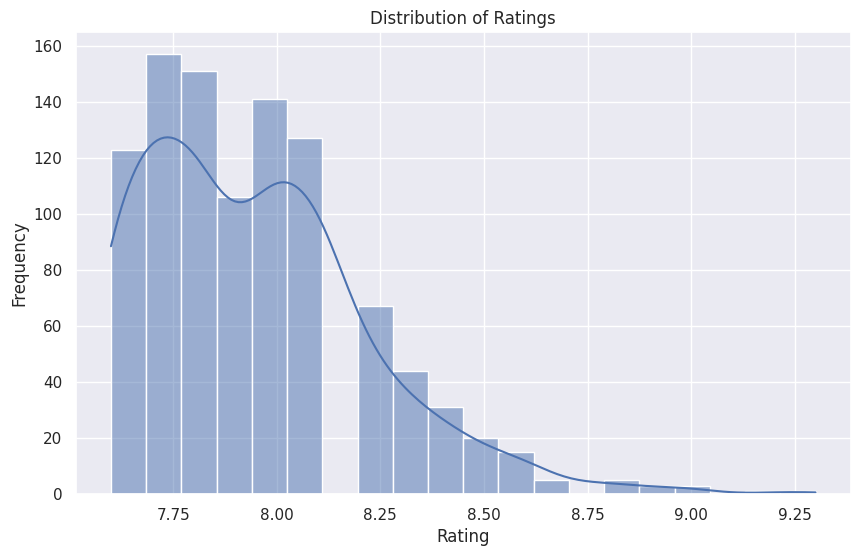

In [10]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.histplot(df["Rating"], bins=20, kde=True) 
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

Year Distribution

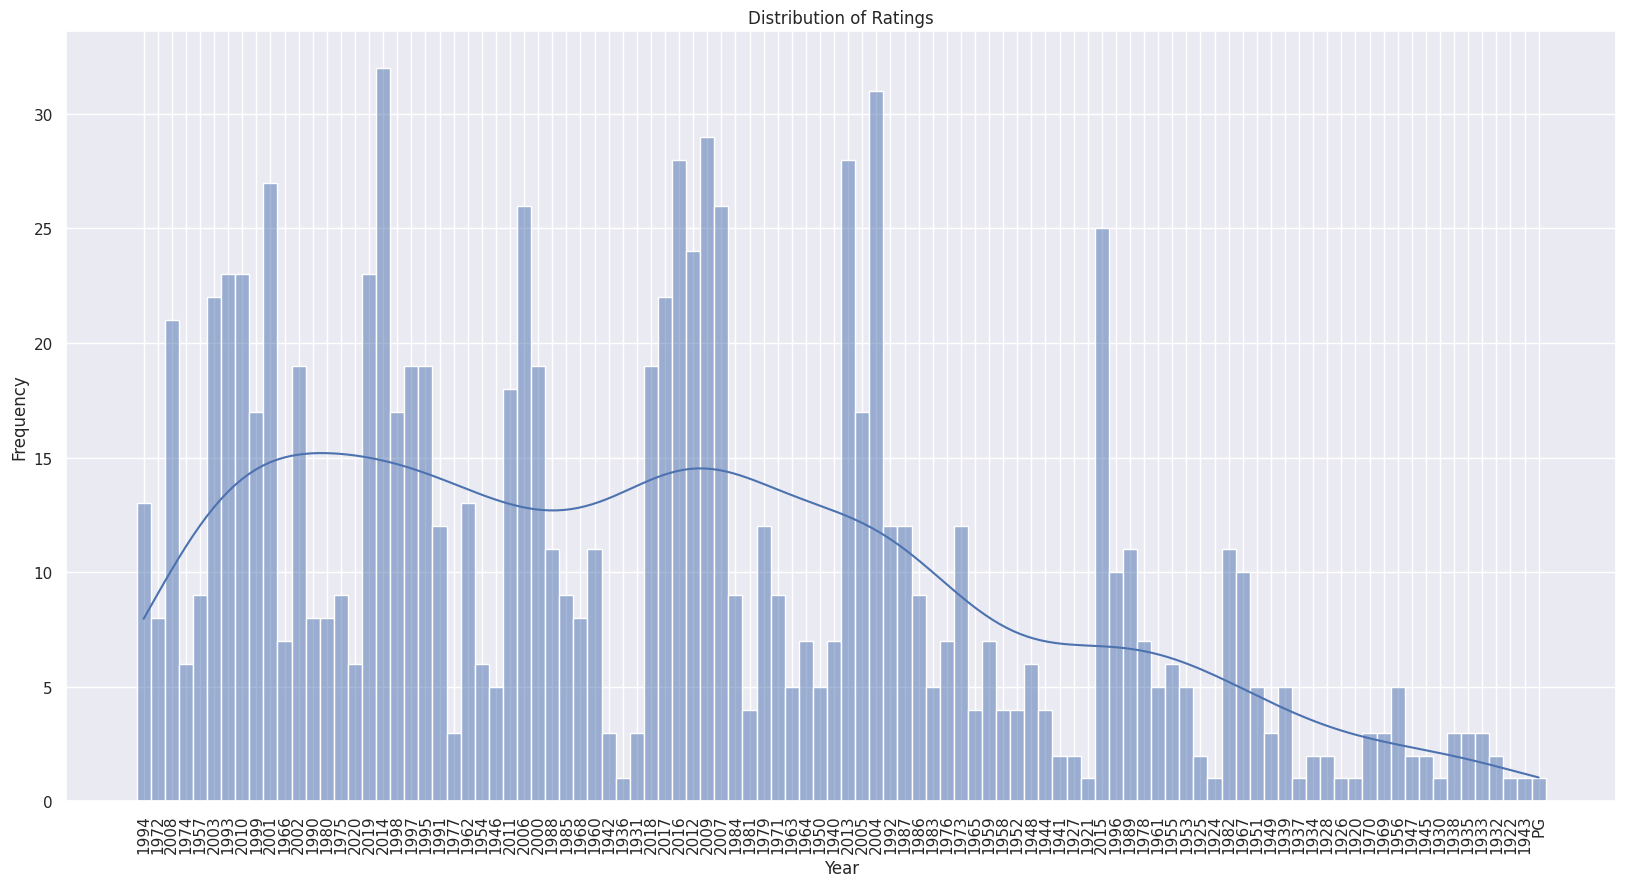

In [11]:
plt.figure(figsize=(20, 10))
sns.histplot(df["Released_Year"], bins=100, kde=True) 
plt.title("Distribution of Ratings")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()